# 期末测验

## 1.数据读取

In [1]:
#相关库导入
import numpy as np
import pandas as pd

#绘图库和中文设置
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题


import seaborn as sns
#忽略waring库
import warnings
warnings.simplefilter(action='ignore')

### 1.1 数据集特征介绍
key - 每个行程的唯一标识符

fare_amount - 每次行程的费用（美元）

pickup_datetime - 计价器启动的日期和时间

passenger_count - 车辆中的乘客人数（驾驶员输入的值）

pickup_longitude - 计价器启动的经度

pickup_latitude - 计价器启动的纬度

dropoff_longitude - 计价器停止的经度

dropoff_latitude - 计价器停止的纬度


### 1.2 训练集相关

In [2]:
#训练集读取
data_train=pd.read_csv('data/data_train.csv')
data_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,58:00.0,11.30,2010-05-22 15:58:00 UTC,-73.997337,40.724172,-73.985135,40.734220,1
1,45:00.0,38.67,2009-07-29 21:45:00 UTC,-73.971218,40.758485,-73.764847,40.702662,5
2,23:00.0,4.00,2014-05-03 12:23:00 UTC,-73.974657,40.756372,-73.978540,40.760230,1
3,55:00.0,3.50,2013-02-16 02:55:00 UTC,-74.009492,40.704732,-74.008412,40.707827,1
4,06:20.0,7.00,2013-02-09 23:06:20 UTC,-73.966460,40.753514,-73.961295,40.770744,4


In [3]:
data_train.shape

(120000, 8)

In [4]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,11.369285,-72.516985,39.924688,-72.528760,39.923535,1.687233
std,9.842659,11.610922,7.805944,14.115540,6.759147,1.438122
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-74.015750,0.000000
25%,6.000000,-73.992050,40.734882,-73.991407,40.733790,1.000000
50%,8.500000,-73.981778,40.752672,-73.980079,40.752986,1.000000
75%,12.500000,-73.967049,40.767185,-73.963631,40.767948,2.000000
max,350.000000,40.808425,1644.421482,40.831932,872.697628,208.000000


### 1.3 测试集相关

In [5]:
#测试集A读取，需要预测内容为fare_amount特征栏
data_testB=pd.read_csv('data/data_testB.csv')
data_testB.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,28:00.0,2012-04-24 20:28:00+00:00,-73.973395,40.763832,-73.959708,40.764337,1
1,49:24.0,2012-01-09 22:49:24+00:00,-73.986946,40.736427,-73.983908,40.741693,1
2,21:00.0,2012-07-23 17:21:00+00:00,-73.975792,40.750567,-73.953150,40.745652,1
3,27:00.0,2014-06-30 15:27:00+00:00,-74.013567,40.702277,-73.984288,40.748892,1
4,30:09.0,2014-10-09 23:30:09+00:00,-73.984408,40.754856,-73.959808,40.771137,1


In [6]:
data_testB.shape

(20397, 7)

## 2.数据处理

### 2.1 缺失值

In [7]:
#训练集缺失值处理检查
missing_values_train=data_train.isnull().sum() #检查缺失值情况
missing_values_train

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
#测试集缺失值处理检查
missing_values_testB=data_testB.isnull().sum()
missing_values_testB

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

结论：无需进行

### 2.2 异常值箱线图

Text(0.5, 1.0, '训练集fare_amount箱线图')

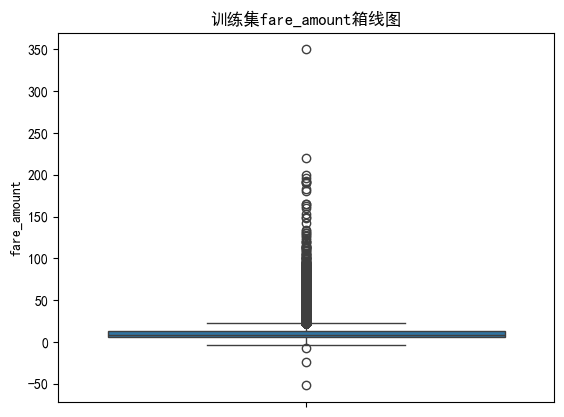

In [9]:
#车费箱线图检测异常值
sns.boxplot(data_train['fare_amount'])
plt.title("训练集fare_amount箱线图")

### 2.3 重复值

In [10]:
data_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119995    False
119996    False
119997    False
119998    False
119999    False
Length: 120000, dtype: bool

结论：无需进行

### 2.4 车费相关

#### 2.4.1 车费数据信息

In [11]:
data_train['fare_amount'].describe()

count    120000.000000
mean         11.369285
std           9.842659
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         350.000000
Name: fare_amount, dtype: float64

结论：出现负值，并且平均在十位情况下，有300+数值出现。

#### 2.4.2 负值车费过滤

In [12]:
data_train[data_train['fare_amount']<=0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5682,43:02.0,-3.5,2015-05-01 14:43:02 UTC,-73.982429,40.775024,-73.981750,40.778439,1
6525,51:13.0,0.0,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
14563,35:32.0,0.0,2015-02-13 07:35:32 UTC,0.000000,0.000000,0.000000,0.000000,5
26256,49:10.0,-23.7,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
33937,47:10.0,-3.3,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
35371,26:44.0,-52.0,2015-02-23 19:26:44 UTC,-73.984665,40.759026,0.000000,0.000000,5
102008,26:03.0,-3.0,2015-05-10 04:26:03 UTC,-73.983727,40.725910,-73.986099,40.722450,2
102741,25:10.0,-7.3,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1
112451,48:08.0,0.0,2015-02-17 08:48:08 UTC,-73.937714,40.758541,-73.937721,40.758541,1
113068,25:07.0,0.0,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1


In [13]:
data_train.drop(data_train[data_train['fare_amount']<=0].index,axis=0,inplace=True)
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000
mean,11.371006,-72.517483,39.924957,-72.530492,39.924485,1.687182
std,9.840209,11.609512,7.805415,14.111464,6.756477,1.438107
min,0.010000,-1340.648410,-74.015515,-3356.666300,-74.015750,0.000000
25%,6.000000,-73.992051,40.734882,-73.991407,40.733796,1.000000
50%,8.500000,-73.981780,40.752670,-73.980080,40.752986,1.000000
75%,12.500000,-73.967051,40.767183,-73.963632,40.767947,2.000000
max,350.000000,40.808425,1644.421482,40.831932,872.697628,208.000000


#### 2.4.2 高额车费

In [14]:
data_train[data_train['fare_amount']>200]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15302,36:11.0,220.0,2013-09-27 12:36:11 UTC,-73.801147,40.671653,-73.790402,40.646742,1
65998,20:00.0,350.0,2014-10-24 20:20:00 UTC,0.000000,0.000000,0.000000,0.000000,3


结论：经纬度相关问题，后续进行解决。

### 2.5 乘客数量相关 

In [15]:
data_train[data_train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16373,20:00.0,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


结论：满载车人员为6，因此这里唯一的超过6的是错误数据。

In [16]:
data_train[data_train['passenger_count']<1]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
204,27:31.0,14.5,2011-07-26 14:27:31 UTC,-73.982100,40.778700,-73.938700,40.810900,0
526,36:42.0,9.7,2011-10-30 18:36:42 UTC,-73.980700,40.764000,-73.980200,40.789700,0
564,48:21.0,8.5,2012-03-05 16:48:21 UTC,-73.941432,40.798628,-73.952102,40.819028,0
611,15:08.0,10.5,2011-09-23 00:15:08 UTC,-73.991400,40.732100,-73.982400,40.767300,0
664,03:56.0,8.5,2011-12-13 23:03:56 UTC,-73.977300,40.762800,-73.975200,40.790700,0
...,...,...,...,...,...,...,...,...
118296,17:16.0,14.9,2012-03-11 13:17:16 UTC,-73.992262,40.743452,-73.945828,40.778700,0
118313,28:29.0,16.9,2012-03-08 17:28:29 UTC,-73.991302,40.729623,-73.990812,40.760670,0
119281,48:27.0,4.1,2012-02-16 18:48:27 UTC,-73.982265,40.782787,-73.976397,40.790898,0
119658,29:50.0,9.7,2011-06-03 08:29:50 UTC,-73.990200,40.731900,-74.009300,40.714700,0


结论：乘客为0时仍有车费收入，明显不合理，删除。

In [17]:
data_train.drop(data_train[data_train['passenger_count']>6].index,axis=0,inplace=True)
data_train.drop(data_train[data_train['passenger_count']<1].index,axis=0,inplace=True)

In [18]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,119557.000000,119557.000000,119557.000000,119557.000000,119557.000000,119557.000000
mean,11.377806,-72.517764,39.925023,-72.529588,39.923871,1.691553
std,9.848810,11.613160,7.811704,14.125833,6.761622,1.307406
min,0.010000,-1340.648410,-74.015515,-3356.666300,-74.015750,1.000000
25%,6.000000,-73.992048,40.734872,-73.991407,40.733790,1.000000
50%,8.500000,-73.981782,40.752660,-73.980080,40.752982,1.000000
75%,12.500000,-73.967056,40.767177,-73.963632,40.767943,2.000000
max,350.000000,40.808425,1644.421482,40.831932,872.697628,6.000000


### 2.6 经纬度相关

#### 2.6.1 纬度处理

In [19]:
data_train['pickup_latitude'].describe()

count    119557.000000
mean         39.925023
std           7.811704
min         -74.015515
25%          40.734872
50%          40.752660
75%          40.767177
max        1644.421482
Name: pickup_latitude, dtype: float64

In [20]:
data_train['dropoff_latitude'].describe()

count    119557.000000
mean         39.923871
std           6.761622
min         -74.015750
25%          40.733790
50%          40.752982
75%          40.767943
max         872.697628
Name: dropoff_latitude, dtype: float64

结论：纬度应该限制在-90到90之间

In [21]:
data_train[(data_train['pickup_latitude']<-90)|(data_train['pickup_latitude']>90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
86397,24:00.0,8.1,2012-03-11 07:24:00 UTC,-73.960828,404.433332,-73.988357,40.769037,1
94660,22:00.0,15.7,2011-11-05 00:22:00 UTC,-1340.648410,1644.421482,-3356.666300,872.697628,1


In [22]:
data_train.drop(data_train[(data_train['pickup_latitude']<-90)|(data_train['pickup_latitude']>90)].index,axis=0,inplace=True)

data_train[(data_train['pickup_latitude']<-90)|(data_train['pickup_latitude']>90)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [23]:
data_train[(data_train['dropoff_latitude']<-90)|(data_train['dropoff_latitude']>90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
81706,50:00.0,13.7,2012-01-20 11:50:00 UTC,-74.011042,40.70978,-73.983163,493.533332,4


In [24]:
data_train.drop(data_train[(data_train['dropoff_latitude']<-90)|(data_train['dropoff_latitude']>90)].index,axis=0,inplace=True)

data_train[(data_train['dropoff_latitude']<-90)|(data_train['dropoff_latitude']>90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


#### 2.6.2 经度处理

In [25]:
data_train['pickup_longitude'].describe()

count    119554.000000
mean        -72.507132
std          11.018952
min        -748.016667
25%         -73.992048
50%         -73.981782
75%         -73.967057
max          40.808425
Name: pickup_longitude, dtype: float64

In [26]:
data_train['dropoff_longitude'].describe()

count    119554.000000
mean        -72.502094
std          10.455990
min         -75.423067
25%         -73.991407
50%         -73.980080
75%         -73.963631
max          40.831932
Name: dropoff_longitude, dtype: float64

结论：经度应该限制在-180到180之间

In [27]:
data_train[(data_train['pickup_longitude']<-180)|(data_train['pickup_longitude']>180)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
63007,26:00.0,33.7,2011-11-05 23:26:00 UTC,-735.200000,40.770092,-73.980187,40.765530,1
64725,58:00.0,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957,-74.003570,40.734192,1
104399,19:00.0,4.1,2012-07-21 16:19:00 UTC,-736.400000,40.774307,-73.982215,40.769672,5


In [28]:
data_train[(data_train['dropoff_longitude']<-180)|(data_train['dropoff_longitude']>180)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [29]:
data_train.drop(data_train[(data_train['pickup_longitude']<-180)|(data_train['pickup_longitude']>180)].index,axis=0,inplace=True)
data_train[(data_train['pickup_longitude']<-180)|(data_train['pickup_longitude']>180)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


#### 2.6.3 经纬范围限制处理

In [30]:
data_testB['pickup_latitude'].describe()

count    20397.000000
mean        40.684556
std          2.782427
min        -74.009697
25%         40.737294
50%         40.752873
75%         40.766597
max         41.164293
Name: pickup_latitude, dtype: float64

In [31]:
data_testB['pickup_longitude'].describe()

count    20397.000000
mean       -73.913006
std          2.781944
min        -75.387785
25%        -73.992395
50%        -73.982544
75%        -73.970762
max         40.780267
Name: pickup_longitude, dtype: float64

In [32]:
data_testB['dropoff_latitude'].describe()

count    20397.000000
mean        40.684774
std          2.782437
min        -74.009465
25%         40.737235
50%         40.753813
75%         40.767487
max         41.158393
Name: dropoff_latitude, dtype: float64

In [33]:
data_testB['dropoff_longitude'].describe()

count    20397.000000
mean       -73.911291
std          2.781961
min        -75.375315
25%        -73.991860
50%        -73.981330
75%        -73.968208
max         40.779517
Name: dropoff_longitude, dtype: float64

In [34]:
data_testB[data_testB['dropoff_latitude']>-72]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,28:00.0,2012-04-24 20:28:00+00:00,-73.973395,40.763832,-73.959708,40.764337,1
1,49:24.0,2012-01-09 22:49:24+00:00,-73.986946,40.736427,-73.983908,40.741693,1
2,21:00.0,2012-07-23 17:21:00+00:00,-73.975792,40.750567,-73.953150,40.745652,1
3,27:00.0,2014-06-30 15:27:00+00:00,-74.013567,40.702277,-73.984288,40.748892,1
4,30:09.0,2014-10-09 23:30:09+00:00,-73.984408,40.754856,-73.959808,40.771137,1
...,...,...,...,...,...,...,...
20392,51:04.0,2013-06-26 14:51:04+00:00,-74.012683,40.702152,-73.983090,40.744710,1
20393,36:00.0,2012-03-13 00:36:00+00:00,-73.989548,40.739742,-73.984168,40.731987,1
20394,35:00.0,2013-06-06 19:35:00+00:00,-73.979340,40.786665,-73.975617,40.776662,1
20395,18:49.0,2013-11-30 20:18:49+00:00,-73.968196,40.762892,-73.922656,40.742917,1


结论：测试集中有一些范围也是明显错误的，并且出现经纬记录相反的情况

##### 经纬相反函数

纽约经纬范围：40~42 -72~-75

In [35]:
# 经纬度反转修复函数
def is_reversed(df, lat_cols, lon_cols):
    swapped_count = 0  # 记录交换次数
    for i, row in df.iterrows():
        for lat_col, lon_col in zip(lat_cols, lon_cols):
            lat, lon = row[lat_col], row[lon_col]
            # 检查反转条件
            if 40 <= lon <= 45 and -75 <= lat <= -71:
                df.at[i, lat_col], df.at[i, lon_col] = lon, lat  # 交换经纬度
                swapped_count += 1
    print(f"反转的经纬度记录数: {swapped_count}")
    return df

# 定义经纬度列
lat_columns = ['pickup_latitude', 'dropoff_latitude']
lon_columns = ['pickup_longitude', 'dropoff_longitude']

# 运行函数并返回结果
data_train_reversed = is_reversed(data_train, lat_columns, lon_columns)

# 查看清理后的描述性统计
data_train_reversed.describe()


反转的经纬度记录数: 134


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,119551.000000,119551.000000,119551.000000,119551.000000,119551.000000,119551.000000
mean,11.377706,-72.554675,39.972815,-72.566358,39.977384,1.691529
std,9.848790,10.151518,5.577535,10.106363,5.561122,1.307381
min,0.010000,-93.824668,-0.020485,-75.423067,-0.018427,1.000000
25%,6.000000,-73.992052,40.734909,-73.991413,40.733847,1.000000
50%,8.500000,-73.981789,40.752678,-73.980092,40.753012,1.000000
75%,12.500000,-73.967095,40.767193,-73.963673,40.767957,2.000000
max,350.000000,0.048832,48.018760,0.045943,45.031598,6.000000


In [36]:
data_testB.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20397.000000,20397.000000,20397.000000,20397.000000,20397.000000
mean,-73.913006,40.684556,-73.911291,40.684774,1.247438
std,2.781944,2.782427,2.781961,2.782437,0.530968
min,-75.387785,-74.009697,-75.375315,-74.009465,1.000000
25%,-73.992395,40.737294,-73.991860,40.737235,1.000000
50%,-73.982544,40.752873,-73.981330,40.753813,1.000000
75%,-73.970762,40.766597,-73.968208,40.767487,1.000000
max,40.780267,41.164293,40.779517,41.158393,3.000000


In [37]:
data_testB_reversed=is_reversed(data_testB,lat_columns,lon_columns)
data_testB_reversed.describe()

反转的经纬度记录数: 24


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20397.000000,20397.000000,20397.000000,20397.000000,20397.000000
mean,-73.980504,40.752054,-73.978790,40.752273,1.247438
std,0.022848,0.023831,0.024155,0.025865,0.530968
min,-75.387785,40.400072,-75.375315,40.400050,1.000000
25%,-73.992405,40.737313,-73.991870,40.737267,1.000000
50%,-73.982552,40.752877,-73.981340,40.753825,1.000000
75%,-73.970792,40.766619,-73.968254,40.767493,1.000000
max,-73.552879,41.164293,-73.552910,41.158393,3.000000


结论：发现仍然有不少很奇怪的经纬度值，对其进行删除处理。

##### 删纬

In [38]:
data_train_reversed[data_train_reversed['pickup_latitude']<40]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
28,47:00.0,6.0,2012-09-23 22:47:00 UTC,0.0,0.0,0.0,0.0,3
72,14:00.0,2.5,2012-05-18 13:14:00 UTC,0.0,0.0,0.0,0.0,1
100,44:00.0,7.3,2011-09-01 23:44:00 UTC,0.0,0.0,0.0,0.0,1
104,40:00.0,14.9,2010-08-09 20:40:00 UTC,0.0,0.0,0.0,0.0,3
109,57:09.0,7.3,2011-08-06 20:57:09 UTC,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
119603,25:00.0,6.5,2010-08-20 18:25:00 UTC,0.0,0.0,0.0,0.0,1
119635,05:00.0,5.5,2014-08-24 22:05:00 UTC,0.0,0.0,0.0,0.0,3
119818,47:00.0,9.0,2013-02-28 15:47:00 UTC,0.0,0.0,0.0,0.0,1
119851,14:00.0,6.1,2010-07-30 01:14:00 UTC,0.0,0.0,0.0,0.0,1


In [39]:
data_train_reversed.drop(data_train_reversed[data_train_reversed['pickup_latitude']<40].index,axis=0,inplace=True)
data_train_reversed[data_train_reversed['pickup_latitude']<40]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [40]:
data_train_reversed[data_train_reversed['pickup_latitude']>48]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
80038,17:34.0,8.0,2014-04-30 07:17:34 UTC,-73.619358,48.01876,-73.983377,40.760342,1


In [41]:
data_train_reversed[data_train_reversed['dropoff_latitude']<40]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1782,18:00.0,2.50,2014-06-05 19:18:00 UTC,-73.983607,40.765537,0.0,0.0,1
1946,39:07.0,12.10,2012-03-21 13:39:07 UTC,-73.956837,40.777958,0.0,0.0,1
5570,16:00.0,19.00,2013-04-26 00:16:00 UTC,-73.981770,40.729957,0.0,0.0,1
6207,05:00.0,19.00,2013-04-03 01:05:00 UTC,-73.981660,40.724547,0.0,0.0,1
6441,05:13.0,33.83,2014-04-02 20:05:13 UTC,-74.001860,40.740624,0.0,0.0,1
...,...,...,...,...,...,...,...,...
113040,19:00.0,52.00,2014-08-12 20:19:00 UTC,-73.996675,40.727217,0.0,0.0,1
114091,12:20.0,2.50,2014-02-02 11:12:20 UTC,-73.964251,40.767941,0.0,0.0,1
116085,18:44.0,8.00,2013-06-07 10:18:44 UTC,-73.989915,40.733402,0.0,0.0,1
118154,15:00.0,57.33,2014-12-25 15:15:00 UTC,-73.975275,40.785430,0.0,0.0,1


In [42]:
data_train_reversed.drop(data_train_reversed[data_train_reversed['dropoff_latitude']<40].index,axis=0,inplace=True)
data_train_reversed[data_train_reversed['dropoff_latitude']<40]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [43]:
data_train_reversed[data_train_reversed['dropoff_latitude']>42]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
80367,49:05.0,6.5,2009-01-01 12:49:05 UTC,-74.689571,45.031653,-74.689603,45.031598,1
100402,57:00.0,9.7,2012-04-24 11:57:00 UTC,-73.334337,42.223633,-73.464092,42.273158,1
116660,25:00.0,20.5,2014-03-17 13:25:00 UTC,-73.955800,40.772690,-71.718700,42.424147,1


##### 删经

In [44]:
data_train_reversed[data_train_reversed['pickup_longitude']<-76]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [45]:
data_train_reversed[data_train_reversed['pickup_longitude']>-69]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3603,16:00.0,5.7,2012-07-21 12:16:00 UTC,-1.216667,40.748597,-74.004822,40.734670,1
5976,29:00.0,5.7,2011-09-07 17:29:00 UTC,0.000000,40.763093,-73.977192,40.765322,1
5981,40:00.0,15.3,2011-12-15 23:40:00 UTC,-0.116667,40.752102,-0.116667,40.752102,1
34566,05:00.0,9.3,2012-06-05 19:05:00 UTC,-1.866667,40.765987,-73.972280,40.793807,1
80360,15:00.0,6.1,2012-02-17 01:15:00 UTC,-7.999920,40.734600,-73.984215,40.737330,1
88768,01:00.0,14.9,2012-02-26 00:01:00 UTC,-0.007712,40.725602,-73.967487,40.766410,5
91641,47:00.0,12.9,2012-06-13 11:47:00 UTC,0.000000,40.751187,-73.999208,40.720160,1
103285,05:00.0,5.3,2012-03-20 15:05:00 UTC,-7.690000,40.713002,-73.997342,40.723965,1
105904,21:00.0,5.7,2012-03-07 11:21:00 UTC,-7.583332,40.768540,-73.974525,40.757332,2
105918,18:00.0,7.0,2013-02-10 16:18:00 UTC,-0.131667,40.757063,-73.991593,40.749953,1


In [46]:
data_train_reversed.drop(data_train_reversed[data_train_reversed['pickup_longitude']>-69].index,axis=0,inplace=True)
data_train_reversed[data_train_reversed['pickup_longitude']>-69]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [47]:
data_train_reversed[data_train_reversed['dropoff_longitude']<-75]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
28186,50:47.0,25.7,2011-02-24 16:50:47 UTC,-75.340251,40.643144,-75.417737,40.767025,2
31995,12:21.0,12.9,2011-03-30 16:12:21 UTC,-75.342904,40.646965,-75.350437,40.686877,1
46226,44:34.0,49.8,2011-04-29 13:44:34 UTC,-75.329188,40.645368,-75.342501,40.646965,1
56818,55:04.0,19.7,2011-04-21 10:55:04 UTC,-75.341696,40.646911,-75.346031,40.705354,1
84807,15:20.0,32.1,2011-05-05 07:15:20 UTC,-73.986632,40.761410,-75.423067,40.773931,2


In [48]:
data_train_reversed[data_train_reversed['dropoff_longitude']>-69]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
6578,31:00.0,10.5,2012-08-07 11:31:00 UTC,-73.987150,40.687925,-0.050000,40.712542,6
20622,22:00.0,6.9,2011-10-27 00:22:00 UTC,-73.989682,40.735220,0.000000,40.745900,1
41378,03:00.0,12.1,2012-01-24 23:03:00 UTC,-73.989282,40.736092,-0.116667,40.752877,5
60259,15:00.0,8.9,2011-12-29 08:15:00 UTC,-73.975138,40.741650,-7.003355,40.747352,1
72215,56:00.0,8.9,2012-07-02 15:56:00 UTC,-73.993072,40.752747,0.000000,40.764628,1
80921,33:00.0,10.9,2012-06-10 14:33:00 UTC,-73.961250,40.801672,-7.990505,40.761437,1
98084,58:00.0,9.0,2013-03-23 20:58:00 UTC,-73.987972,40.727948,0.000000,40.746405,1
103143,47:00.0,7.7,2012-08-18 14:47:00 UTC,-73.995277,40.717490,-0.333333,40.731828,1
118886,33:00.0,12.5,2011-10-11 09:33:00 UTC,-73.973397,40.784545,-0.116667,40.750467,1


In [49]:
data_train_reversed.drop(data_train_reversed[data_train_reversed['dropoff_longitude']>-69].index,axis=0,inplace=True)
data_train_reversed[data_train_reversed['dropoff_longitude']>-69]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [50]:
data_train_reversed.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,117120.000000,117120.000000,117120.000000,117120.000000,117120.000000,117120.000000
mean,11.362544,-73.974976,40.751137,-73.974137,40.751271,1.691590
std,9.770904,0.043190,0.039337,0.043309,0.036411,1.307583
min,0.010000,-75.419276,40.002405,-75.423067,40.005487,1.000000
25%,6.000000,-73.992261,40.736552,-73.991594,40.735291,1.000000
50%,8.500000,-73.982073,40.753385,-73.980525,40.753728,1.000000
75%,12.500000,-73.968293,40.767565,-73.965433,40.768297,2.000000
max,220.000000,-69.041415,48.018760,-69.046738,45.031598,6.000000


## 3.数据类型转换 

### 3.1 数据类型检验

In [51]:
data_train_reversed.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [52]:
data_testB_reversed.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

结论：时间类型可以转换为时间类

### 3.2 时间类型转换

In [53]:
for dataset in [data_train_reversed,data_testB_reversed]:
    dataset['pickup_datetime']=pd.to_datetime(dataset['pickup_datetime'])

In [54]:
data_train_reversed.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

### 3.3 时间间隔分离

In [55]:
for dataset in [data_train_reversed,data_testB_reversed]:
    dataset['year']=dataset['pickup_datetime'].dt.year
    dataset['month']=dataset['pickup_datetime'].dt.month
    dataset['day']=dataset['pickup_datetime'].dt.day
    dataset['hour']=dataset['pickup_datetime'].dt.hour
    dataset['day of week']=dataset['pickup_datetime'].dt.dayofweek

In [56]:
data_train_reversed.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week
0,58:00.0,11.30,2010-05-22 15:58:00+00:00,-73.997337,40.724172,-73.985135,40.734220,1,2010,5,22,15,5
1,45:00.0,38.67,2009-07-29 21:45:00+00:00,-73.971218,40.758485,-73.764847,40.702662,5,2009,7,29,21,2
2,23:00.0,4.00,2014-05-03 12:23:00+00:00,-73.974657,40.756372,-73.978540,40.760230,1,2014,5,3,12,5
3,55:00.0,3.50,2013-02-16 02:55:00+00:00,-74.009492,40.704732,-74.008412,40.707827,1,2013,2,16,2,5
4,06:20.0,7.00,2013-02-09 23:06:20+00:00,-73.966460,40.753514,-73.961295,40.770744,4,2013,2,9,23,5


## 4.距离计算

### 4.1 距离计算函数

In [57]:
def distance(la1,lon1,la2,lon2):
    data=[data_train_reversed,data_testB_reversed]
    for i in data:
        R=6371
        phi1=np.radians(i[la1])
        phi2=np.radians(i[la2])

        delta_phi=np.radians(i[la2]-i[la1])
        delta_lambda=np.radians(i[lon2]-i[lon1])

        a=np.sin(delta_phi/2.0)**2+np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2.0)**2

        c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))

        d=(R*c)

        i['H_Distance']=d
    
    return d

#执行计算
distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        1.154080
1        0.639050
2        1.984111
3        5.740615
4        2.751348
           ...   
20392    5.349134
20393    0.974200
20394    1.155610
20395    4.432639
20396    1.470831
Length: 20397, dtype: float64

### 4.2 距离数据信息

In [58]:
data_train_reversed['H_Distance'].describe()

count    117120.000000
mean          3.347522
std           4.549522
min           0.000000
25%           1.253288
50%           2.160958
75%           3.909881
max         807.614710
Name: H_Distance, dtype: float64

In [59]:
data_testB_reversed['H_Distance'].describe()

count    20397.000000
mean         2.412389
std          1.596405
min          0.000253
25%          1.216558
50%          1.978331
75%          3.197875
max          7.854107
Name: H_Distance, dtype: float64

### 4.3 删除距离0而有价格的异常值

In [60]:
data_train_reversed[(data_train_reversed['H_Distance']==0)&(data_train_reversed['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
187,20:00.0,20.5,2012-09-18 12:20:00+00:00,-73.965037,40.759425,-73.965037,40.759425,1,2012,9,18,12,1,0.0
188,52:55.0,4.5,2011-03-05 09:52:55+00:00,-73.969475,40.798042,-73.969475,40.798042,1,2011,3,5,9,5,0.0
376,06:00.0,6.9,2010-05-01 13:06:00+00:00,-73.992287,40.721032,-73.992287,40.721032,5,2010,5,1,13,5,0.0
401,55:00.0,10.0,2014-03-28 11:55:00+00:00,-73.995775,40.755595,-73.995775,40.755595,5,2014,3,28,11,4,0.0
919,00:00.0,7.7,2012-08-31 12:00:00+00:00,-73.994635,40.746165,-73.994635,40.746165,1,2012,8,31,12,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119845,20:00.0,7.7,2011-02-28 09:20:00+00:00,-73.990975,40.750655,-73.990975,40.750655,2,2011,2,28,9,0,0.0
119882,27:24.0,9.3,2009-09-30 20:27:24+00:00,-73.137393,41.366138,-73.137393,41.366138,2,2009,9,30,20,2,0.0
119884,07:00.0,13.0,2012-12-12 08:07:00+00:00,-73.962868,40.798950,-73.962868,40.798950,1,2012,12,12,8,2,0.0
119906,35:58.0,25.5,2012-12-31 19:35:58+00:00,-73.793718,40.656698,-73.793718,40.656698,1,2012,12,31,19,0,0.0


In [61]:
data_train_reversed.drop(data_train_reversed[(data_train_reversed['H_Distance']==0)&(data_train_reversed['fare_amount']!=0)].index,axis=0,inplace=True)
data_train_reversed[(data_train_reversed['H_Distance']==0)&(data_train_reversed['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance


In [62]:
data_train_reversed.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
count,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000,115881.000000
mean,11.366096,-73.975356,40.751028,-73.974508,40.751164,1.691330,2011.749286,6.276698,15.720204,13.475911,3.047566,3.383314
std,9.695997,0.040303,0.037722,0.040440,0.034626,1.307054,1.865038,3.440597,8.686167,6.519901,1.944345,4.560522
min,0.010000,-75.419276,40.002405,-75.423067,40.005487,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000084
25%,6.000000,-73.992272,40.736598,-73.991601,40.735332,1.000000,2010.000000,3.000000,8.000000,9.000000,1.000000,1.277901
50%,8.500000,-73.982100,40.753399,-73.980561,40.753748,1.000000,2012.000000,6.000000,16.000000,14.000000,3.000000,2.184123
75%,12.500000,-73.968426,40.767567,-73.965618,40.768300,2.000000,2013.000000,9.000000,23.000000,19.000000,5.000000,3.940856
max,220.000000,-69.041415,48.018760,-69.046738,45.031598,6.000000,2015.000000,12.000000,31.000000,23.000000,6.000000,807.614710


In [63]:
data_train_reversed[data_train_reversed['fare_amount']>200]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance
15302,36:11.0,220.0,2013-09-27 12:36:11+00:00,-73.801147,40.671653,-73.790402,40.646742,1,2013,9,27,12,4,2.914493


## 5. 车费计算

### 5.1 每公里车费

In [64]:
data_train_reversed['fare_per_mile']=data_train_reversed.fare_amount/data_train_reversed.H_Distance
data_train_reversed.fare_per_mile.describe()

count    115881.000000
mean         92.655839
std        5040.420600
min           0.001402
25%           2.966112
50%           3.821709
75%           5.063796
max      667985.030660
Name: fare_per_mile, dtype: float64

In [65]:
data_train_reversed[data_train_reversed['H_Distance']<0.01]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day of week,H_Distance,fare_per_mile
901,28:27.0,3.00,2015-01-18 22:28:27+00:00,-73.987762,40.749447,-73.987778,40.749489,2,2015,1,18,22,6,0.004840,619.888143
1017,53:00.0,49.15,2009-02-20 12:53:00+00:00,-73.776243,40.645730,-73.776253,40.645673,5,2009,2,20,12,4,0.006394,7686.872169
1458,13:00.0,32.00,2011-05-30 17:13:00+00:00,-73.788948,40.642043,-73.788950,40.642043,1,2011,5,30,17,0,0.000169,189631.887502
1749,27:00.0,2.50,2010-11-25 18:27:00+00:00,-73.789678,40.643798,-73.789667,40.643794,1,2010,11,25,18,3,0.001029,2429.155277
1800,00:54.0,49.57,2010-11-29 00:00:54+00:00,-74.003806,40.748146,-74.003806,40.748182,1,2010,11,29,0,0,0.004003,12383.158890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118579,43:51.0,65.00,2011-10-12 23:43:51+00:00,-73.662741,40.725787,-73.662745,40.725776,1,2011,10,12,23,2,0.001269,51231.959348
119708,57:39.0,2.50,2011-12-01 13:57:39+00:00,-73.999763,40.674494,-73.999771,40.674487,1,2011,12,1,13,3,0.001030,2427.044429
119728,26:00.0,2.50,2009-03-27 04:26:00+00:00,-74.005672,40.726317,-74.005640,40.726327,2,2009,3,27,4,4,0.002917,857.097500
119997,49:04.0,52.00,2015-02-12 19:49:04+00:00,-73.995285,40.724609,-73.995346,40.724648,1,2015,2,12,19,3,0.006667,7799.981184


## 6.模型训练


In [66]:
data_train_reversed.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'year', 'month', 'day', 'hour', 'day of week',
       'H_Distance', 'fare_per_mile'],
      dtype='object')

In [67]:
data_testB_reversed.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'day of week', 'H_Distance'],
      dtype='object')

#### 特征选择

In [68]:
#选择特征
x_train=data_train_reversed.drop(columns='fare_amount')
x_test=data_testB_reversed

y_train=data_train_reversed.fare_amount

num_feats = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
    'dropoff_latitude', 'passenger_count','year','month','day','hour','day of week']
x_train= x_train[num_feats]
x_test=x_test[num_feats]

In [69]:
x_train.shape

(115881, 10)

In [70]:
y_train.shape

(115881,)

### 6.1 随机森林算法实现

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

R2分数

In [73]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_train, y_pred_train)
print('R2 score:',r2_score)  # 打印r2分数

R2 score: 0.9781682364888463


In [74]:
out_df = pd.DataFrame()
out_df['fare_amount'] = y_pred_test

In [75]:
out_df

,fare_amount
0,5.2570
1,4.5830
2,10.0757
3,21.5168
4,10.6100
...,...
20392,17.5746
20393,5.4020
20394,5.9900
20395,15.8677


In [76]:
StudentId = '22211360121'#写自己的学号
subdir='sub/'
import datetime
out_df.to_csv(subdir + StudentId + 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y%m%d_%H%M%S')),
            index=False)

## 这里生成结果CSV，这里的代码不能改

In [77]:
print(data_train_reversed.shape)  # 打印数据框的行列数
print(data_train_reversed.head())  # 查看前几行


(115881, 15)
       key  fare_amount           pickup_datetime  pickup_longitude  \
0  58:00.0        11.30 2010-05-22 15:58:00+00:00        -73.997337   
1  45:00.0        38.67 2009-07-29 21:45:00+00:00        -73.971218   
2  23:00.0         4.00 2014-05-03 12:23:00+00:00        -73.974657   
3  55:00.0         3.50 2013-02-16 02:55:00+00:00        -74.009492   
4  06:20.0         7.00 2013-02-09 23:06:20+00:00        -73.966460   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.724172         -73.985135         40.734220                1   
1        40.758485         -73.764847         40.702662                5   
2        40.756372         -73.978540         40.760230                1   
3        40.704732         -74.008412         40.707827                1   
4        40.753514         -73.961295         40.770744                4   

   year  month  day  hour  day of week  H_Distance  fare_per_mile  
0  2010      5   22    15          

### 6.2 Xgboost 

In [78]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib # 引入 joblib 用于保存模型

# 读取数据
test_cleaned_4 = data_testB_reversed
train_cleaned_4 = data_train_reversed

# 特征和标签
X_train = train_cleaned_4.iloc[:, [3, 4, 5, 6, 7,8, 9, 10, 11, 12]]
Y_train = train_cleaned_4.iloc[:, [1]]

# 将 y_train 转换为一维数组
y_train = Y_train.values.ravel()

# 定义最佳超参数
best_params = {
    'learning_rate': 0.12968264538229451,
    'max_depth': 4.92933111131474,
    'n_estimators': 423.6181008904446
}

# 定义 XGBoost 模型
xgb_model = xgb.XGBRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=int(best_params['max_depth']), # max_depth 需要是整数
    n_estimators=int(best_params['n_estimators']), # n_estimators 需要是整数
    random_state=42
)

# 使用整个训练集训练模型
xgb_model.fit(X_train, y_train)

# 保存模型
xgb_model.save_model('xgb_model_B_one.json') # 使用 XGBoost 的保存方法


In [79]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'hour',
       'day of week'],
      dtype='object')

In [80]:
X_test=data_testB_reversed.iloc[:, [2,3, 4, 5, 6, 7,8, 9, 10, 11]]
Y_test=xgb_model.predict(X_test)

In [81]:
y_pred_train_2=xgb_model.predict(X_train)
y_pred_test_2=xgb_model.predict(X_test)

In [82]:
from sklearn.metrics import r2_score
r2_score = r2_score(Y_train, y_pred_train_2)
print('R2 score:',r2_score)  # 打印r2分数

R2 score: 0.881963312625885


In [83]:
out_df=pd.DataFrame()
out_df['fare_amount']=Y_test
out_df

,fare_amount
0,4.851844
1,4.956957
2,8.672813
3,18.320665
4,9.759565
...,...
20392,18.113077
20393,4.441728
20394,6.095395
20395,15.942715


In [ ]:
StudentId = '22211360121'
subdir='sub/'
import datetime
out_df.to_csv(subdir + StudentId + 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y%m%d_%H%M%S')),
            index=False)

## 总结

这次机器学习期末大作业中，目标是预测出租车的车费。主要可以分为数据处理和模型构建两个主要部分。
在数据处理阶段，首先对训练集和测试集的数据进行详细检查，包括特征的基本信息，如车费金额、乘客数量、经纬度和时间等。在数据清洗过程中，处理了数据中的缺失值、异常值以及重复值。例如，通过箱线图分析车费异常值，筛选并清除了不合理的车费记录；针对乘客数量和经纬度信息，删除了超出合理范围的异常数据，并修正了因经纬度交换错误导致的记录。此外，还提取了日期时间信息中的年、月、日、小时等特征，并利用经纬度计算出乘车距离。

在模型构建阶段，分别使用了随机森林回归和XGBoost模型来进行车费预测。随机森林模型的R²分数达到0.978，而XGBoost模型的R²分数为0.882，表明两种模型均具有较高的预测能力。还通过调整超参数来优化模型性能，并对预测结果进行了评估。

总体来说，这次实验让我对数据清洗、特征提取和模型训练的全过程有了更深的理解，增进了机器学习在实际应用上的体验。